## Assigment 14

#### Import all library neccessary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Download the Tree Inventory database

In [2]:
url = "https://data.winnipeg.ca/api/views/hfwk-jp4h/rows.csv?accessType=DOWNLOAD"
from urllib.request import urlretrieve
urlretrieve(url,"trees.csv")

('trees.csv', <http.client.HTTPMessage at 0x1d096e342e0>)

#### Get the first five item from data

In [3]:
data = pd.read_csv("trees.csv")
data.head()

,Tree ID,Botanical Name,Common Name,Electoral Ward,Neighbourhood,Diameter at Breast Height,Park,Location Class,Property Type,Street,Street From,Street To,X,Y,DED Tag Number,Location,Point
0,31292,Ulmus americana,American Elm,Mynarski,SEVEN OAKS,63,Not In Park,Boulevard,Public (UFB),Tait Av,Jones St,End,635000.119661,5.532778e+06,NaN,"(49.93210537850106, -97.11887832544365)",POINT (-97.118878325444 49.932105378501)
1,317431,Ulmus pumila,Siberian Elm,North Kildonan,KIL-CONA PARK,30,Kilcona Park,Park,Public (UFB),Lagimodiere Bv,NaN,NaN,641581.779351,5.533792e+06,NaN,"(49.93969094089111, -97.02685212882488)",POINT (-97.026852128825 49.939690940891)
2,317520,Ulmus pumila,Siberian Elm,North Kildonan,KIL-CONA PARK,31,Kilcona Park,Park,Public (UFB),Lagimodiere Bv,NaN,NaN,641581.598701,5.533787e+06,NaN,"(49.93964649862137, -97.02685646235649)",POINT (-97.026856462356 49.939646498621)
3,317872,Quercus macrocarpa,bur oak,St. Vital,WORTHINGTON,39,Beliveau Forest,Park,Public (UFB),Beliveau Rd,NaN,NaN,636112.137002,5.522218e+06,NaN,"(49.83692756325324, -97.1071089378112)",POINT (-97.107108937811 49.836927563253)
4,317953,Quercus macrocarpa,bur oak,St. Vital,WORTHINGTON,9,Beliveau Forest,Park,Public (UFB),Beliveau Rd,NaN,NaN,636110.413873,5.522232e+06,NaN,"(49.837052394492794, -97.10712802791979)",POINT (-97.10712802792 49.837052394493)


#### Get the graph for the data we got

<Axes: >

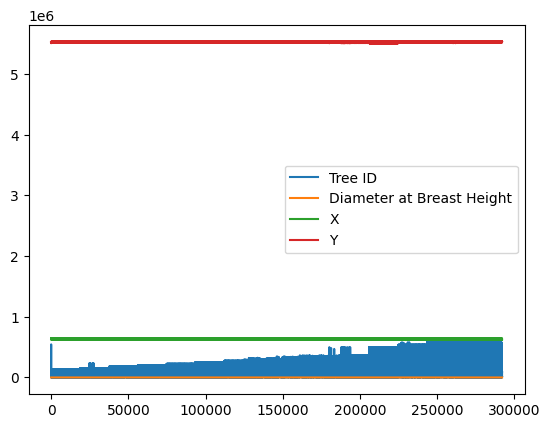

In [4]:
data.plot()

I am not able to get anything useful out of this graph

#### Get the data shape

In [5]:
print(data.shape)

(291995, 17)


#### Get all the column of data

In [6]:
print(data.columns)

Index(['Tree ID', 'Botanical Name', 'Common Name', 'Electoral Ward',
       'Neighbourhood', 'Diameter at Breast Height', 'Park', 'Location Class',
       'Property Type', 'Street', 'Street From', 'Street To', 'X', 'Y',
       'DED Tag Number', 'Location', 'Point'],
      dtype='object')


#### Create a dataframe of tree common name and its count

In [7]:
tree_count = data['Common Name'].value_counts()
tree_duplicates = pd.DataFrame({'Common Name': tree_count.index, 'Count': tree_count.values})

print(tree_duplicates)

                         Common Name  Count
0                          green ash  83025
1                       American Elm  44851
2                     Linden species  26986
3                       Siberian Elm  18409
4                            bur oak  17017
..                               ...    ...
176           'Top Gun' (TM) bur oak      1
177                   lodgepole pine      1
178                Dwarf Sour Cherry      1
179                     black cherry      1
180  Prairie Expedition American elm      1

[181 rows x 2 columns]


#### draw a bar chart of the highest 20 tree common name and its count

<Axes: xlabel='Common Name'>

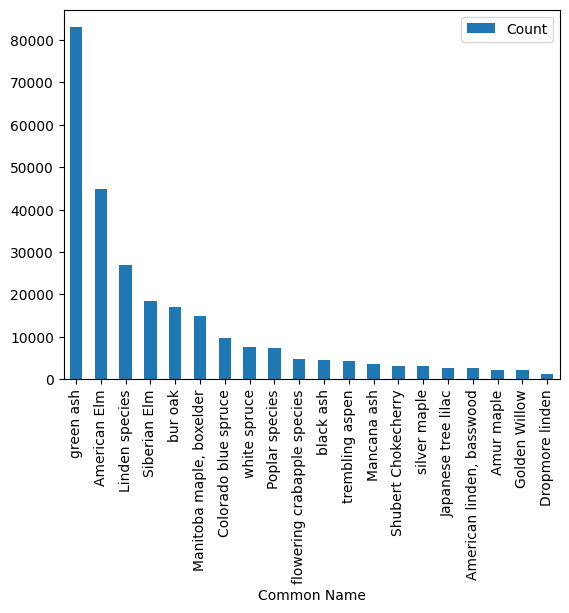

In [8]:
tree_duplicates.head(20).plot.bar(x = 'Common Name', y = 'Count')

From the above graph, green ash is the most common type of tree in Winnipeg

#### draw a bar chart of the lowest 20 tree common name and its count

<Axes: xlabel='Common Name'>

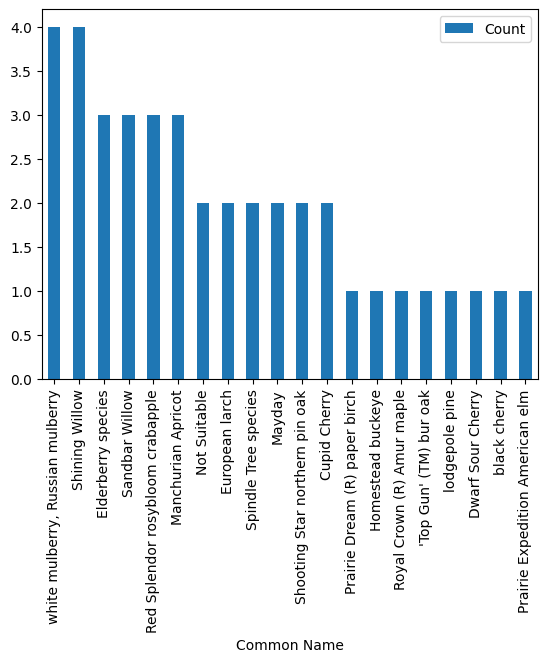

In [9]:
tree_duplicates.tail(20).plot.bar(x = 'Common Name', y = 'Count')

From the graph, there are 8 type of tree that are rarest in Winnipeg with only one record

#### Create a dataframe of tree location class and its count

In [10]:
location_class_count = data['Location Class'].value_counts()
location_class_duplicate = pd.DataFrame({'CLocation Class': location_class_count.index, 'Count': location_class_count.values}, index= location_class_count.index)


print(location_class_duplicate)

            CLocation Class   Count
Boulevard         Boulevard  198631
Park                   Park   91498
Golf Course     Golf Course    1393
Back Lane         Back Lane     201
Other                 Other     114
Natural             Natural     109
Front Yard       Front Yard      24
Back Yard         Back Yard      12
Riverbank         Riverbank       8
Side Yard         Side Yard       4
Cemetery           Cemetery       1


#### draw a pie chart of the tree location class and its count

<Axes: ylabel='Count'>

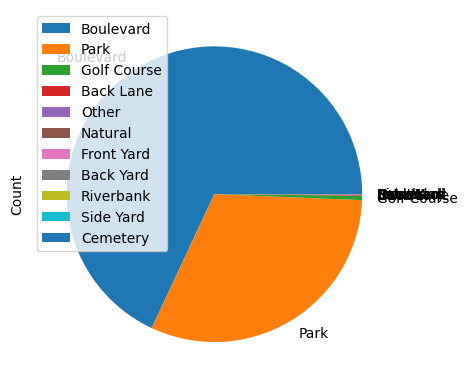

In [11]:
location_class_duplicate.head(20).plot.pie(y = 'Count')

From the above graph, the amount of tree on boulevards occupied more than 50% the amount of tree at other location. Park is also a location class that have much higher amount of tree compared to other location classes, but still not comparable to the amount of tree on boulevards

#### Create a dataframe of Property Type and its count	

In [12]:
property_type_count = data['Property Type'].value_counts()
property_type_duplicates = pd.DataFrame({'Property Type': property_type_count.index, 'Count': property_type_count.values})


print(property_type_count)

Public (UFB)    290370
Public (COW)      1625
Name: Property Type, dtype: int64


#### draw a bar chart of Property Type and its count

<Axes: xlabel='Property Type'>

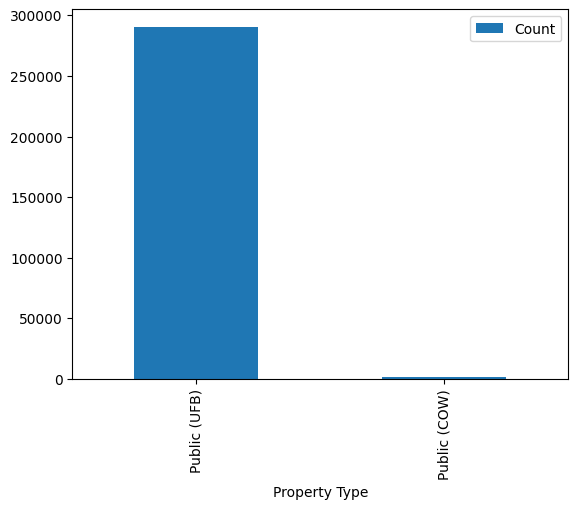

In [13]:
property_type_duplicates.plot.bar(x = 'Property Type', y = 'Count')

From the graph, public (UFB) has more than 250000 trees and is much higher than public (COW)

#### Create a dataframe of Neighbourhood and its count	

In [14]:
neighbourhood_count = data['Neighbourhood'].value_counts()
neighbourhood_duplicates = pd.DataFrame({'Neighbourhood': neighbourhood_count.index, 'Count': neighbourhood_count.values})


print(neighbourhood_count)

RIVER PARK SOUTH      6087
PULBERRY              5978
KILDONAN PARK         5795
LINDEN WOODS          5781
FORT RICHMOND         5291
                      ... 
PORTAGE & MAIN          13
ASSINIBOINE PARK        10
TRAPPISTES               8
SYMINGTON YARDS          6
PACIFIC INDUSTRIAL       4
Name: Neighbourhood, Length: 231, dtype: int64


#### draw a bar chart of the highest 10 Neighbourhood and its count

<Axes: >

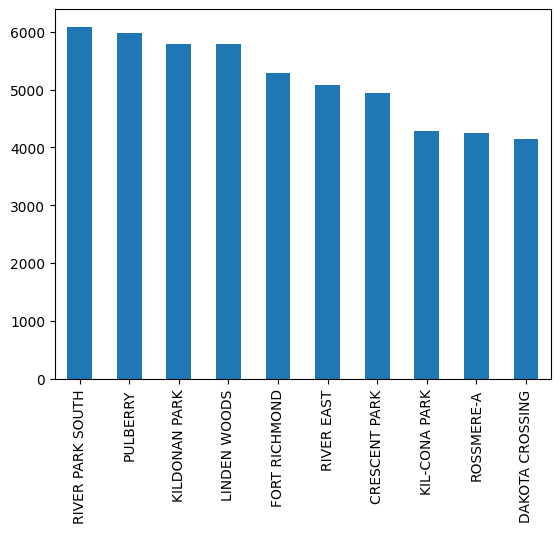

In [15]:
neighbourhood_count.head(10).plot.bar(x = 'Neighbourhood', y = 'Count')

From the graph, River Park South is the neighbourhood that has the most tree with more than 6000 trees.

#### Create a dataframe of Electoral Ward and its count	

In [16]:
electoral_ward_count = data['Electoral Ward'].value_counts()
electoral_ward_duplicates = pd.DataFrame({'Electoral Ward': electoral_ward_count.index, 'Count': electoral_ward_count.values})


print(electoral_ward_duplicates)

                     Electoral Ward  Count
0        River Heights - Fort Garry  25922
1                    North Kildonan  24470
2   Charleswood - Tuxedo - Westwood  24311
3                         St. Vital  22914
4      Fort Rouge - East Fort Garry  21885
5                         Transcona  21589
6                          Mynarski  21439
7         St. Norbert - Seine River  20910
8                      St. Boniface  19943
9                     Waverley West  18213
10                        St. James  16505
11                     Old Kildonan  15634
12                    Point Douglas  13367
13          Elmwood - East Kildonan  13198
14                  Daniel McIntyre  11085


#### draw a bar chart Electoral Ward and its count

<Axes: xlabel='Electoral Ward'>

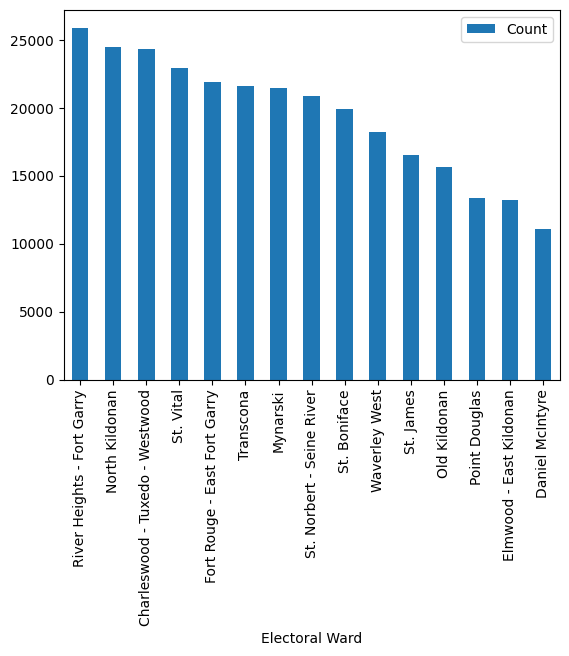

In [17]:
electoral_ward_duplicates.plot.bar(x = 'Electoral Ward', y = 'Count')

From the graph, River Heights - Fort Gary is the electoral ward with the highest amount of tree

#### Download the Battery-electric vehicles 2012-2023 (2023-04-04) database

In [18]:
url = "https://data.winnipeg.ca/api/views/4her-3th5/rows.csv?accessType=DOWNLOAD"
urlretrieve(url,"311request.csv")


('311request.csv', <http.client.HTTPMessage at 0x1d09feebe80>)

#### Get the first five item from data

In [19]:
data2 = pd.read_csv("311request.csv")
data2.head()


,Date,Service Area,Service Request,Ward,Neighbourhood,Location 1,Point
0,"January 22, 2021 05:42 PM",Water,Water Main Leak,St. Boniface,Maginot,"(49.870997416948086, -97.0808250501166)",POINT (-97.080825050117 49.870997416948)
1,"February 01, 2021 08:10 PM",Street Maintenance,Graffiti,Mynarski,St. John's,"(49.9213701274821, -97.1412940120793)",POINT (-97.141294012079 49.921370127482)
2,"February 02, 2022 09:34 AM",Street Maintenance,Snow Removal - Roads,Elmwood - East Kildonan,Valley Gardens,"(49.91994678354974, -97.06459465781396)",POINT (-97.064594657814 49.91994678355)
3,"February 21, 2023 06:02 PM",Garbage & Recycling,Missed Garbage Collection,Fort Rouge - East Fort Garry,South Portage,"(49.88866398506291, -97.14624876226428)",POINT (-97.146248762264 49.888663985063)
4,"February 17, 2022 11:05 AM",Street Maintenance,Snow Removal - Roads,St. James,Crestview,"(49.88277977976207, -97.31613869337833)",POINT (-97.316138693378 49.882779779762)


#### Get the data shape

In [20]:
print(data2.shape)

(107314, 7)


#### Get the data columns

In [21]:
print(data2.columns)

Index(['Date', 'Service Area', 'Service Request', 'Ward', 'Neighbourhood',
       'Location 1', 'Point'],
      dtype='object')


#### Get the time in a days and its appearance count

In [22]:
data2['Date'] = pd.to_datetime(data2['Date'])  # convert the 'Time' column to a datetime data type
data2['Hour'] = data2['Date'].dt.hour  # create a new 'Hour' column with the hour of the day
hour_counts = data2['Hour'].value_counts().sort_index()
hour_request = pd.DataFrame({'Hour': hour_counts.index, 'Request Count': hour_counts.values})

print(hour_request)

    Hour  Request Count
0      0           1157
1      1            691
2      2            356
3      3            358
4      4            379
5      5            479
6      6           1264
7      7           3452
8      8           7185
9      9           8432
10    10           8422
11    11           7771
12    12           7228
13    13           7436
14    14           7624
15    15           7086
16    16           6196
17    17           5016
18    18           8386
19    19           5851
20    20           4456
21    21           3649
22    22           2906
23    23           1534


#### Draw a graph for the dataframe of the amount of 311 request in each hour in a day

<Axes: xlabel='Hour'>

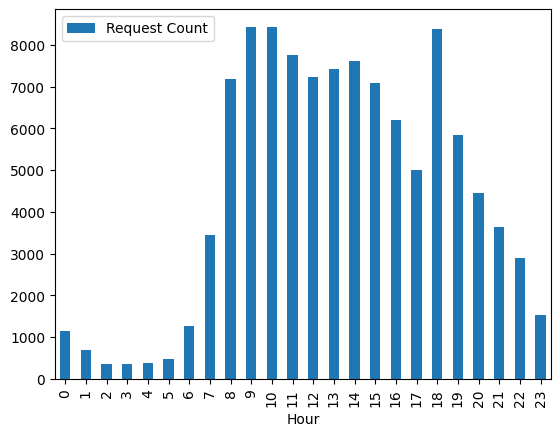

In [23]:
hour_request.plot.bar(x = "Hour", y = "Request Count")

From the graph, we can see that 8-9 am and 6 pm are the time that has the most 311 request in a day

#### Get the service area and its appearance count

In [24]:
service_area_count = data2['Service Area'].value_counts()
service_area_duplicates = pd.DataFrame({'Service Area': service_area_count.index, 'Count': service_area_count.values})


print(service_area_duplicates)

              Service Area  Count
0      Garbage & Recycling  37121
1       Street Maintenance  37063
2       By Law Enforcement  20595
3                    Water   4967
4         Sewer & Drainage   4043
5          Animal Services   2448
6  Parks and Urban Foresty    657
7           Insect Control    420


#### Draw a graph for the dataframe of the service are and its count

<Axes: xlabel='Service Area'>

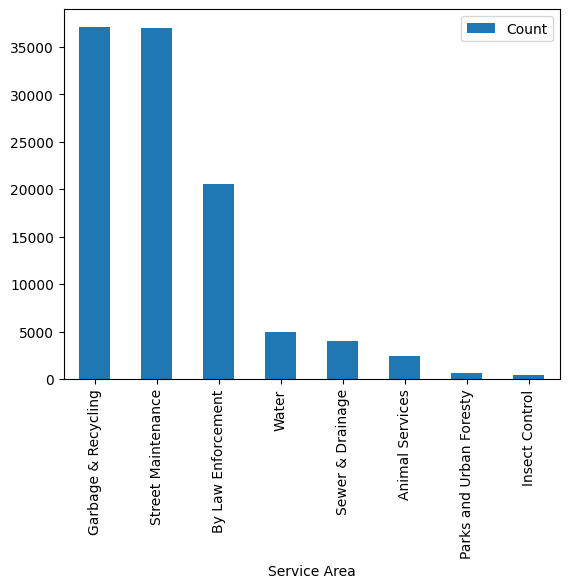

In [25]:
service_area_duplicates.plot.bar(x = "Service Area", y = "Count")

From the graph and the data printed out, Garbage & Recycling and Street Maintenance are the service area with the most request call, whereas, Insect Control is the service area with the lowest amount of request call

#### Get the service request type and its appearance count

In [26]:
service_request_count = data2['Service Request'].value_counts()
service_request_duplicates = pd.DataFrame({'Service Request': service_request_count.index, 'Count': service_request_count.values})


print(service_request_duplicates)

                        Service Request  Count
0             Missed Garbage Collection  23916
1   Neighbourhood Liveability Complaint  20595
2           Missed Recycling Collection  13205
3                  Snow Removal - Roads  11896
4                              Potholes  10370
5                       Water Main Leak   4967
6                    Frozen Catch Basin   4187
7                          Sewer Backup   4043
8                              Graffiti   4016
9              Snow Removal - Sidewalks   3439
10                        Dog Complaint   2448
11                     Sidewalk Repairs   1588
12           Litter Container Complaint   1050
13                              Sanding    641
14                     Boulevard Mowing    533
15      Tree Pest Caterpillar Complaint    306
16                   Mosquito Complaint    114


#### Draw a graph for the dataframe of the service request type and its count

<Axes: xlabel='Service Request'>

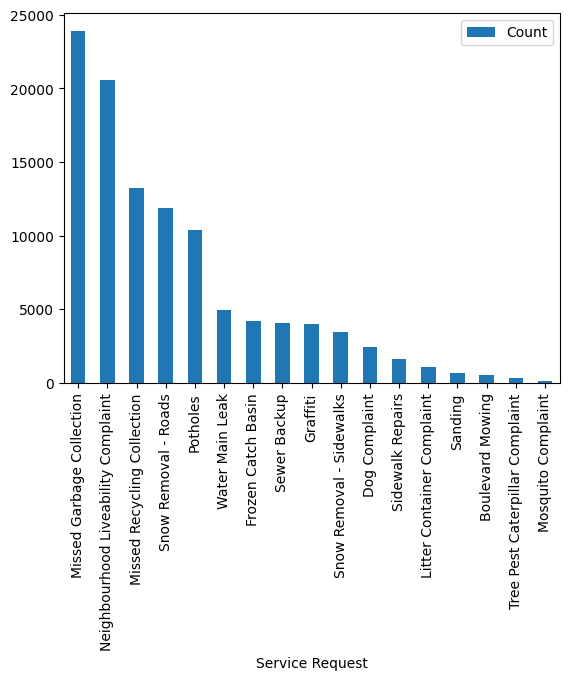

In [27]:
service_request_duplicates.plot.bar(x = "Service Request", y = "Count")

From the graph, Missed garbage collection is the most common type of complaint that people call 311 for, and mosquito is the rarest type of complaint

#### Get the ward name and its appearance count

In [28]:
ward_count = data2['Ward'].value_counts()
ward_duplicates = pd.DataFrame({'Ward': ward_count.index, 'Count': ward_count.values})


print(ward_duplicates)

                               Ward  Count
0                          Mynarski  14593
1                     Point Douglas   8157
2      Fort Rouge - East Fort Garry   7943
3                   Daniel McIntyre   7617
4                         St. James   7605
5           Elmwood - East Kildonan   7191
6                         St. Vital   7102
7        River Heights - Fort Garry   6792
8                      St. Boniface   6791
9                         Transcona   6544
10  Charleswood - Tuxedo - Westwood   5772
11        St. Norbert - Seine River   5719
12                     Old Kildonan   5608
13                   North Kildonan   5511
14                    Waverley West   4365


#### Draw a graph for the dataframe of the Ward name and its count

<Axes: xlabel='Ward'>

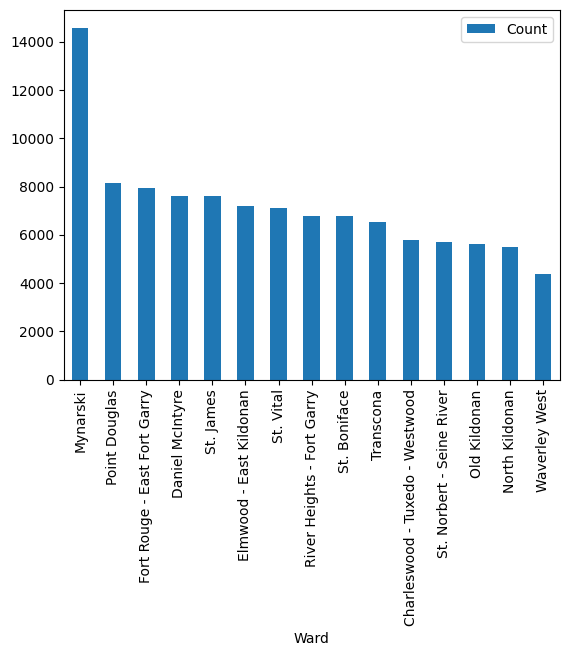

In [29]:
ward_duplicates.plot.bar(x = "Ward", y = "Count")

From the graph, Mynarski is the ward with the most call to 311.